In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import re

# 데이터 확인 및 전처리

In [ ]:
data = pd.read_csv('clear_text.csv', encoding='cp949', header=None)
data.columns = ['a', 'b','c','d','e']

print(len(data))
print(data.head())

500
              a  ...                                                  e
0         배색원피스  ...  "코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-" ? ♥ MD COMME...
1         배색원피스  ...  "코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-" ? ♥ MD COMME...
2         배색원피스  ...  "코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-" ? ♥ MD COMME...
3         배색원피스  ...  "코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-" ? ♥ MD COMME...
4  레이어트뷔스티에 원피스  ...  "페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-" ?? ♥ MD COMMENT 다...

[5 rows x 5 columns]


In [ ]:
cols = ['a', 'b', 'c', 'd']
data['question'] = data[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

data.head()

,a,b,c,d,e,question
0,배색원피스,아이보리,free,"손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME...","배색원피스,아이보리,free,손세탁, 드라이, 울세탁"
1,배색원피스,핑크,free,"손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME...","배색원피스,핑크,free,손세탁, 드라이, 울세탁"
2,배색원피스,스카이블루,free,"손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME...","배색원피스,스카이블루,free,손세탁, 드라이, 울세탁"
3,배색원피스,네이비,free,"손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME...","배색원피스,네이비,free,손세탁, 드라이, 울세탁"
4,레이어트뷔스티에 원피스,베이지,free,"손세탁, 드라이","""페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-"" ?? ♥ MD COMMENT 다...","레이어트뷔스티에 원피스,베이지,free,손세탁, 드라이"


In [ ]:
data = pd.DataFrame({'question':data['question'], 'answer':data['e']})
data.head()

,question,answer
0,"배색원피스,아이보리,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
1,"배색원피스,핑크,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
2,"배색원피스,스카이블루,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
3,"배색원피스,네이비,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
4,"레이어트뷔스티에 원피스,베이지,free,손세탁, 드라이","""페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-"" ?? ♥ MD COMMENT 다..."


In [ ]:
# train_data = data

In [ ]:
data2 = pd.read_excel('shart_clear.xlsx', header=None)
data2.columns = ['a', 'b','c','d','e']

print(len(data2))
print(data2.head())

504
               a  ...                                                  e
0  핑크데이지 체크레이스 탑  ...  정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...
1    퍼플라벨 반팔 새상품  ...  정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구...
2    퍼플라벨 반팔 새상품  ...  정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구...
3    퍼플라벨 반팔 새상품  ...  정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구...
4  핑크데이지 체크레이스 탑  ...  정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...

[5 rows x 5 columns]


In [ ]:
cols = ['a', 'b', 'c', 'd']
data2['question'] = data2[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)

data2.head()

,a,b,c,d,e,question
0,핑크데이지 체크레이스 탑,스트로베리,free,드라이,정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...,"핑크데이지 체크레이스 탑,스트로베리,free,드라이"
1,퍼플라벨 반팔 새상품,블루,free,손세탁,"정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구...","퍼플라벨 반팔 새상품,블루,free,손세탁"
2,퍼플라벨 반팔 새상품,블랙,free,손세탁,"정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구...","퍼플라벨 반팔 새상품,블랙,free,손세탁"
3,퍼플라벨 반팔 새상품,화이트,free,손세탁,"정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구...","퍼플라벨 반팔 새상품,화이트,free,손세탁"
4,핑크데이지 체크레이스 탑,스트로베리,S,"손세탁, 드라이, 울세탁",정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...,"핑크데이지 체크레이스 탑,스트로베리,S,손세탁, 드라이, 울세탁"


In [ ]:
data2 = pd.DataFrame({'question':data2['question'], 'answer':data2['e']})
data2.head()

,question,answer
0,"핑크데이지 체크레이스 탑,스트로베리,free,드라이",정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...
1,"퍼플라벨 반팔 새상품,블루,free,손세탁","정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구..."
2,"퍼플라벨 반팔 새상품,블랙,free,손세탁","정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구..."
3,"퍼플라벨 반팔 새상품,화이트,free,손세탁","정가 32,000원 S사이즈 입니다. 택이 있는 새상품 제 상점에서 두 개 이상 구..."
4,"핑크데이지 체크레이스 탑,스트로베리,S,손세탁, 드라이, 울세탁",정말 딱 스트로베리🍓색이 정말 예뻐요!색감이나 재질이 고퀄리티인데다가기본가부터 워낙...


In [ ]:
train_data = pd.concat([data, data2])
train_data.head()

,question,answer
0,"배색원피스,아이보리,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
1,"배색원피스,핑크,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
2,"배색원피스,스카이블루,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
3,"배색원피스,네이비,free,손세탁, 드라이, 울세탁","""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ? ♥ MD COMME..."
4,"레이어트뷔스티에 원피스,베이지,free,손세탁, 드라이","""페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-"" ?? ♥ MD COMMENT 다..."


In [ ]:
print('챗봇 샘플의 개수 :', len(train_data))

챗봇 샘플의 개수 : 500


In [ ]:
print(train_data.isnull().sum())

question    0
answer      2
dtype: int64


In [ ]:
train_data = train_data.dropna(subset=['answer'])

print(train_data.isnull().sum())
print('챗봇 샘플의 개수 :', len(train_data))

question    0
answer      0
dtype: int64
챗봇 샘플의 개수 : 498


In [ ]:
questions = []
for sentence in train_data['question']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    # sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [ ]:
answers = []
for sentence in train_data['answer']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub("아띠", "", sentence)
    sentence = re.sub("아뜨", "", sentence)
    sentence = re.sub("랑스", "", sentence)
    # sentence = sentence.strip()
    answers.append(sentence)

In [ ]:
print(questions[0])
print(answers[0])

배색원피스,아이보리,free,손세탁, 드라이, 울세탁
"코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-" ? ♥ MD COMMENT 이건 보자마자 바로 님들께 보여드려야 겠다! 생각한 원피스에요♥ 바쁜 아침이나, 집 앞 데이트룩, 스니커즈나 샌들과도 이지하게 입기 좋은 베이직 니트 원피스 소개해드릴게요 :) 부드러우면서 유연한 니트 패브릭으로 기분 좋은 착용감을 선사드리며, 쫀~득 신축성으로 불편함이 전혀 없어요! 휘뚜루마뚜루~ 즐겨 입기 좋아 단품으로, 때로는 레이어드용으로 자주 손이 가는 데일리 원피스랍니다-♪  ♥ DETAIL TIP 입는 순간 부드럽게 바디를 감싸주는 촉촉한 니트 패브릭의 미니 원피스예요 :) 깔끔한 카라넥에 트임을 더해 여성스러움이 더욱 느껴지구요, 카라넥과 소매단에 배색을 더해주어 밋밋함 없는 은은한 포인트를 더했어요♥ 또한, 바디라인 곡선을 따라 부드럽게 핏되는 슬림핏 디자인으로 S라인 몸매를 완성해주며, 미니-미디 기장으로 롱님들도 부담 없이 착용해보실 수 있답니다  ♥ COLOR TIP 컬러의 경우, 총 4가지 컬러로 준비되어 있어요 :)  *아이보리- 부드럽고 뽀얀 색감의 아이보리 *핑크- 여자들의 로망, 로맨틱 핑크 *스카이블루- 여리여리 청순한 스카이블루 *네이비- 캐주얼하면서도 세련된 네이비  ♥ SIZE TIP FREE 사이즈로 준비되었으니 하단의 상세사이즈를 참고해주세요.  촬영을 진행한 기솔모델은 키 167cm, 슬림55 바디랍니다♪  44 ~ 55반 사이즈까지 추천해드릴게요. ? ★세탁 시 드라이클리닝 해주시거나 울세제로 단독손세탁하여 관리해주세요.  ──────────────────────── MATERIAL (혼용률) : ACRYL 75% + POLYESTER 25% 두께 : 중간 , 비침 : 중간 신축 : 높음 , 안감 : 없음 세탁법 : 손세탁 드라이 단독세탁 울세탁 세탁기금지?세탁건조기 사용불가 ──────────────────────── ? ? 


# 단어 집합 생성 모듈

In [ ]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [ ]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [3930]
종료 토큰 번호 : [3931]
단어 집합의 크기 : 3932


# 정수 인코딩과 패딩

In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[0])))

임의의 질문 샘플을 정수 인코딩 : [2879, 3718, 114, 3718, 37, 3718, 68, 1, 26, 1, 564]


In [ ]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[0]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [2879, 3718, 114, 3718, 37, 3718, 68, 1, 26, 1, 564]
기존 문장: 배색원피스,아이보리,free,손세탁, 드라이, 울세탁


In [ ]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

2879 ----> 배색원피스
3718 ----> ,
114 ----> 아이보리
3718 ----> ,
37 ----> free
3718 ----> ,
68 ----> 손세탁
1 ----> , 
26 ----> 드라이
1 ----> , 
564 ----> 울세탁


In [ ]:
# 최대 길이를 정의
MAX_LENGTH = 150 #300->200->150 maybe 뒤의 세탁내용을 제외하니 학습률이 올라가는 듯
# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

In [ ]:
questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (498, 150)
답변 데이터의 크기(shape) : (498, 150)


In [ ]:
# 0번 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[3930 2879 3718  114 3718   37 3718   68    1   26    1  564 3931    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[  72 2748 2735  909  464   58 2606    1 1615 1652 1225 1678 2562  187
  166  873 1677   51  647    1 1503 2950   57  239 2729  199  109 2979
 2890 2804    1 1506 3719  115  129 2902  344   64  297   14   87  327
  121    3  189   53    1

# 인코더, 디코더 입력 후 레이블 생성

In [ ]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 32
BUFFER_SIZE = 8000

교사 강요(teacher forcing)란, 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법입니다. 훈련할 때 교사 강요를 사용할 경우, 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고, t 시점의 레이블. 즉, 실제 알고있는 정답을 t+1 시점의 입력으로 사용합니다.

물론, 훈련 과정에서도 이전 시점의 출력을 다음 시점의 입력으로 사용하면서 훈련 시킬 수도 있지만 이는 한 번 잘못 예측하면 뒤에서의 예측까지 영향을 미쳐 훈련 시간이 느려지게 되므로 교사 강요를 사용하여 RNN을 좀 더 빠르고 효과적으로 훈련시킬 수 있습니다.



In [ ]:
# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

In [ ]:
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 299가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 299가 된다.

[  72 2748 2735  909  464   58 2606    1 1615 1652 1225 1678 2562  187
  166  873 1677   51  647    1 1503 2950   57  239 2729  199  109 2979
 2890 2804    1 1506 3719  115  129 2902  344   64  297   14   87  327
  121    3  189   53    1  556 2991  179  330   65 1277  114   25  423
 2862 2853  114  130  186   25 2810 2903    1  471  186  130  440   25
  601  406  440  130  483   25 2747  220  483  327   18    3  106   30
  160  159  156   89  177 1042 1045 1686 1017 1705    1  569 1333 1740
  306 1355  669  879 1584 1293  429  439  258  927  919  991  999   50
   48   13   10   12   33 2984 2987   54   31 2994   15   23    2   16
    5   22    2   66   21    2  184    5   19    2   32   20    2   39
   17   36  205  358 3737   27   29   28 1007 3931]
[[  72 2748 2735  909  464   58 2606    1 1615 1652 1225 1678 2562  187
   166  873 1677   51  647    1 1503 2950   57  239 2729  199  109 2979
  2890 2804    1 1506 3719  115  129 2902  344   64  297   14   87  327
   121    3  189   53 

# 트랜스포머 만들기

In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    angle_rads = np.zeros(angle_rads.shape)
    angle_rads[:, 0::2] = sines
    angle_rads[:, 1::2] = cosines
    pos_encoding = tf.constant(angle_rads)
    pos_encoding = pos_encoding[tf.newaxis, ...]

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [ ]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

In [ ]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")

  # 패딩 마스크(두번째 서브층)
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [ ]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [ ]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
tf.keras.backend.clear_session()

# Hyper-parameters
D_MODEL = 64
NUM_LAYERS = 2
NUM_HEADS = 4
DFF = 128
DROPOUT = 0.1

In [ ]:
model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT
    ) #

(1, 3932, 64)
(1, 3932, 64)


In [ ]:
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 64)     318592      inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

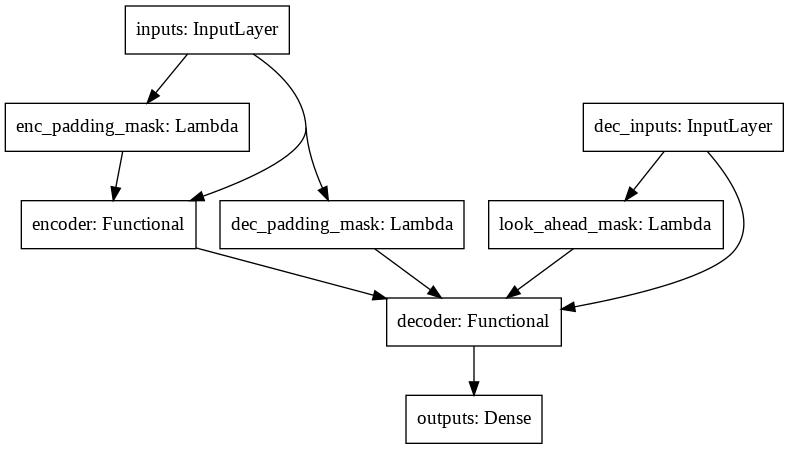

In [ ]:
from tensorflow import keras
# keras.utils.plot_model(model, 'transformers_model.png')
keras.utils.plot_model(model)

In [ ]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
EPOCHS = 100
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/100
16/16 [==============================] - 8s 30ms/step - loss: 7.9295 - accuracy: 7.7585e-05
Epoch 2/100
16/16 [==============================] - 0s 30ms/step - loss: 8.0053 - accuracy: 1.6059e-04
Epoch 3/100
16/16 [==============================] - 0s 29ms/step - loss: 7.9460 - accuracy: 2.9889e-04
Epoch 4/100
16/16 [==============================] - 0s 30ms/step - loss: 7.8509 - accuracy: 4.8589e-04
Epoch 5/100
16/16 [==============================] - 0s 29ms/step - loss: 7.8476 - accuracy: 0.0062
Epoch 6/100
16/16 [==============================] - 0s 30ms/step - loss: 7.7697 - accuracy: 0.0216
Epoch 7/100
16/16 [==============================] - 0s 29ms/step - loss: 7.7892 - accuracy: 0.0288
Epoch 8/100
16/16 [==============================] - 0s 29ms/step - loss: 7.7350 - accuracy: 0.0301
Epoch 9/100
16/16 [==============================] - 0s 30ms/step - loss: 7.6370 - accuracy: 0.0330
Epoch 10/100
16/16 [==============================] - 0s 30ms/step - loss: 7.5685 - 

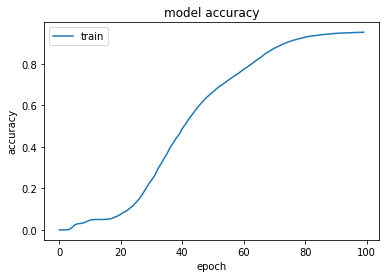

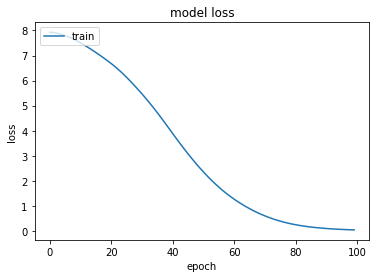

In [ ]:
# 학습 과정을 조회한다.
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('transformer.h5')
# model.save_weights('transformer.h5', overwrite=True)  # 덮어쓸건지 여부
## 이유는 모르는데 가중치 저장만 됨 -> 모델층을 쌓고 가중치만 씌워서 사용해야 할 듯..

NotImplementedError: ignored

# 챗봇 평가하기

In [ ]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)

In [ ]:
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [ ]:
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [1]:
cloth = input()
color = input()
size = input()
cleaning = input()

레이어드 원피스
노란색
L
손세탁


In [ ]:
predict(",{},{},{}")

Input: 롱원피스,베이지,free,손세탁
Output:   "운동할때도 예쁘고 힙하게- 후드집업+크롭탑+숏팬츠 3피스 구성의 트레이닝-"  ♥ MD COMMENT 알찬구성♥ 9피스세트로 준비한 트레이닝 소개해드릴게요:) 코팅된듯 매끄러운 패브릭으로 완성되어 입는순간 기분좋은 착용감을 선사해 드린답니다♥ 힘이 있는 쫀쫀한 텐션감까지 더해져 활동하기에도 편안하실꺼에요! 요즘 대세 디테일♪나시 크롭탑으로살짝 보이는 잘록한허리라인!더욱핫한무드로 즐기기 좋구요- 크롭기장의 후드집업과같이 착용해주시면 부담스럽지않으실꺼?


'  "운동할때도 예쁘고 힙하게- 후드집업+크롭탑+숏팬츠 3피스 구성의 트레이닝-"  ♥ MD COMMENT 알찬구성♥ 9피스세트로 준비한 트레이닝 소개해드릴게요:) 코팅된듯 매끄러운 패브릭으로 완성되어 입는순간 기분좋은 착용감을 선사해 드린답니다♥ 힘이 있는 쫀쫀한 텐션감까지 더해져 활동하기에도 편안하실꺼에요! 요즘 대세 디테일♪나시 크롭탑으로살짝 보이는 잘록한허리라인!더욱핫한무드로 즐기기 좋구요- 크롭기장의 후드집업과같이 착용해주시면 부담스럽지않으실꺼?'

# 모델 가중치 로드 후 결과 확인

In [ ]:
from tensorflow.keras.models import load_model
model.load_weights("transformers.h5")

OSError: ignored

In [ ]:
predict("미니원피스,베이지,44-66,손세탁, 드라이")